In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from yellowbrick.classifier import ClassificationReport

In [2]:
df = pd.read_csv(r'~/Desktop/covid/COVID_Cases_Restricted_Detailed_12042020.csv')

In [3]:
df.head(10)

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
0,Unknown,Laboratory-confirmed case,2020-09-15,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
1,Unknown,Laboratory-confirmed case,2020-09-27,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
2,Unknown,Laboratory-confirmed case,2020-09-13,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
3,Unknown,Laboratory-confirmed case,2020-07-31,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
4,Unknown,Laboratory-confirmed case,2020-10-01,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
5,Unknown,Laboratory-confirmed case,2020-10-08,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
6,Unknown,Laboratory-confirmed case,2020-10-11,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
7,NaN,Laboratory-confirmed case,2020-08-17,NaN,2020-07-25,2020-07-27,Yes,Yes,No,NaN,...,Missing,Yes,Yes,Missing,Yes,Yes,72005.0,AGUADILLA,PR,50 - 59 Years
8,NaN,Probable Case,2020-10-30,NaN,NaN,2020-10-26,Missing,Missing,Missing,NaN,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,50 - 59 Years
9,NaN,Laboratory-confirmed case,2020-08-16,NaN,NaN,NaN,Missing,Missing,Missing,NaN,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,50 - 59 Years


In [4]:
df.tail(10)

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
8405069,"American Indian/Alaska Native, Non-Hispanic",Laboratory-confirmed case,2020-06-09,Male,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,4027.0,Yuma,AZ,50 - 59 Years
8405070,"American Indian/Alaska Native, Non-Hispanic",Laboratory-confirmed case,2020-06-24,Male,NaN,NaN,Yes,Missing,Yes,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,4027.0,Yuma,AZ,50 - 59 Years
8405071,"American Indian/Alaska Native, Non-Hispanic",Laboratory-confirmed case,2020-07-08,Male,2020-06-26,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,4027.0,Yuma,AZ,50 - 59 Years
8405072,"American Indian/Alaska Native, Non-Hispanic",Laboratory-confirmed case,2020-10-17,Male,2020-10-13,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,4027.0,Yuma,AZ,50 - 59 Years
8405073,"American Indian/Alaska Native, Non-Hispanic",Laboratory-confirmed case,2020-06-23,Male,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,4027.0,Yuma,AZ,50 - 59 Years
8405074,Hispanic/Latino,Laboratory-confirmed case,2020-08-04,Male,2020-07-29,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,8125.0,Yuma,CO,10 - 19 Years
8405075,Hispanic/Latino,Laboratory-confirmed case,2020-05-31,Male,2020-05-26,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,8125.0,Yuma,CO,10 - 19 Years
8405076,Hispanic/Latino,Laboratory-confirmed case,2020-07-07,Male,NaN,NaN,Missing,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,8125.0,Yuma,CO,10 - 19 Years
8405077,Hispanic/Latino,Laboratory-confirmed case,2020-05-28,Male,NaN,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,8125.0,Yuma,CO,10 - 19 Years
8405078,Hispanic/Latino,Laboratory-confirmed case,2020-05-28,Male,2020-05-25,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,8125.0,Yuma,CO,10 - 19 Years


In [5]:
df.drop(['race_ethnicity_combined','current_status', 'cdc_report_dt', 'onset_dt', 'pos_spec_dt', 'county_fips_code', 'res_county','res_state', 'age_group','hc_work_yn','pna_yn','abxchest_yn','acuterespdistress_yn','sfever_yn','chills_yn','myalgia_yn','runnose_yn','sthroat_yn','nauseavomit_yn','headache_yn','abdom_yn','diarrhea_yn'],axis ='columns',inplace = True)
df.head()

,sex,hosp_yn,icu_yn,death_yn,mechvent_yn,fever_yn,cough_yn,sob_yn,medcond_yn
0,Female,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
1,Female,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
2,Female,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
3,Female,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,Female,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing


In [6]:
df.dropna(inplace=True)
df.head()

,sex,hosp_yn,icu_yn,death_yn,mechvent_yn,fever_yn,cough_yn,sob_yn,medcond_yn
0,Female,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
1,Female,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
2,Female,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
3,Female,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,Female,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing


In [7]:
df = df.loc[~((df['sex'] == 'Missing')| (df['hosp_yn'] == 'Missing') | (df['icu_yn'] == 'Missing') | (df['death_yn'] == 'Missing') | (df['fever_yn'] == 'Missing')| (df['cough_yn'] == 'Missing')| (df['sob_yn'] == 'Missing')| (df['mechvent_yn'] == 'Missing')| (df['medcond_yn'] == 'Missing')),:]

df.head()

,sex,hosp_yn,icu_yn,death_yn,mechvent_yn,fever_yn,cough_yn,sob_yn,medcond_yn
195,Female,Unknown,Unknown,Unknown,Unknown,No,Unknown,Unknown,Unknown
196,Female,Unknown,Unknown,Unknown,Unknown,No,Unknown,Unknown,Unknown
197,Female,No,No,No,No,No,No,No,No
198,Female,Unknown,Unknown,Unknown,Unknown,No,Unknown,Unknown,Unknown
199,Female,No,Unknown,No,Unknown,No,No,No,Unknown


In [8]:
df = df.loc[~((df['sex'] == 'Unknown') | (df['hosp_yn'] == 'Unknown') |(df['icu_yn'] == 'Unknown') | (df['death_yn'] == 'Unknown') | (df['fever_yn'] == 'Unknown')| (df['cough_yn'] == 'Unknown')| (df['sob_yn'] == 'Unknown')| (df['mechvent_yn'] == 'Unknown')| (df['medcond_yn'] == 'Unknown')),:]

df.head()

,sex,hosp_yn,icu_yn,death_yn,mechvent_yn,fever_yn,cough_yn,sob_yn,medcond_yn
197,Female,No,No,No,No,No,No,No,No
208,Female,No,No,No,No,Yes,Yes,No,Yes
213,Female,No,No,No,No,No,No,No,No
216,Female,No,No,No,No,Yes,Yes,No,No
541,Female,No,No,No,No,No,Yes,No,Yes


In [9]:
df.shape

(335365, 9)

In [10]:
df['sex'] = df['sex'].map({'Female': 0,'Male': 1})
df.head()

,sex,hosp_yn,icu_yn,death_yn,mechvent_yn,fever_yn,cough_yn,sob_yn,medcond_yn
197,0,No,No,No,No,No,No,No,No
208,0,No,No,No,No,Yes,Yes,No,Yes
213,0,No,No,No,No,No,No,No,No
216,0,No,No,No,No,Yes,Yes,No,No
541,0,No,No,No,No,No,Yes,No,Yes


In [11]:
df['hosp_yn'] = df['hosp_yn'].map({'No': 0,'Yes': 1})
df.head()

,sex,hosp_yn,icu_yn,death_yn,mechvent_yn,fever_yn,cough_yn,sob_yn,medcond_yn
197,0,0,No,No,No,No,No,No,No
208,0,0,No,No,No,Yes,Yes,No,Yes
213,0,0,No,No,No,No,No,No,No
216,0,0,No,No,No,Yes,Yes,No,No
541,0,0,No,No,No,No,Yes,No,Yes


In [12]:
df['icu_yn'] = df['icu_yn'].map({'No': 0,'Yes': 1})
df.head()

,sex,hosp_yn,icu_yn,death_yn,mechvent_yn,fever_yn,cough_yn,sob_yn,medcond_yn
197,0,0,0,No,No,No,No,No,No
208,0,0,0,No,No,Yes,Yes,No,Yes
213,0,0,0,No,No,No,No,No,No
216,0,0,0,No,No,Yes,Yes,No,No
541,0,0,0,No,No,No,Yes,No,Yes


In [13]:
df['death_yn'] = df['death_yn'].map({'No': 0,'Yes': 1})
df.head()

,sex,hosp_yn,icu_yn,death_yn,mechvent_yn,fever_yn,cough_yn,sob_yn,medcond_yn
197,0,0,0,0,No,No,No,No,No
208,0,0,0,0,No,Yes,Yes,No,Yes
213,0,0,0,0,No,No,No,No,No
216,0,0,0,0,No,Yes,Yes,No,No
541,0,0,0,0,No,No,Yes,No,Yes


In [14]:
df['mechvent_yn'] = df['mechvent_yn'].map({'No': 0,'Yes': 1})
df.head()

,sex,hosp_yn,icu_yn,death_yn,mechvent_yn,fever_yn,cough_yn,sob_yn,medcond_yn
197,0,0,0,0,0,No,No,No,No
208,0,0,0,0,0,Yes,Yes,No,Yes
213,0,0,0,0,0,No,No,No,No
216,0,0,0,0,0,Yes,Yes,No,No
541,0,0,0,0,0,No,Yes,No,Yes


In [15]:
df['fever_yn'] = df['fever_yn'].map({'No': 0,'Yes': 1})
df.head()

,sex,hosp_yn,icu_yn,death_yn,mechvent_yn,fever_yn,cough_yn,sob_yn,medcond_yn
197,0,0,0,0,0,0,No,No,No
208,0,0,0,0,0,1,Yes,No,Yes
213,0,0,0,0,0,0,No,No,No
216,0,0,0,0,0,1,Yes,No,No
541,0,0,0,0,0,0,Yes,No,Yes


In [16]:
df['cough_yn'] = df['cough_yn'].map({'No': 0,'Yes': 1})
df.head()

,sex,hosp_yn,icu_yn,death_yn,mechvent_yn,fever_yn,cough_yn,sob_yn,medcond_yn
197,0,0,0,0,0,0,0,No,No
208,0,0,0,0,0,1,1,No,Yes
213,0,0,0,0,0,0,0,No,No
216,0,0,0,0,0,1,1,No,No
541,0,0,0,0,0,0,1,No,Yes


In [17]:
df['sob_yn'] = df['sob_yn'].map({'No': 0,'Yes': 1})
df.head()

,sex,hosp_yn,icu_yn,death_yn,mechvent_yn,fever_yn,cough_yn,sob_yn,medcond_yn
197,0,0,0,0,0,0,0,0,No
208,0,0,0,0,0,1,1,0,Yes
213,0,0,0,0,0,0,0,0,No
216,0,0,0,0,0,1,1,0,No
541,0,0,0,0,0,0,1,0,Yes


In [18]:
df['medcond_yn'] = df['medcond_yn'].map({'No': 0,'Yes': 1})
df.head()

,sex,hosp_yn,icu_yn,death_yn,mechvent_yn,fever_yn,cough_yn,sob_yn,medcond_yn
197,0,0,0,0,0,0,0,0,0
208,0,0,0,0,0,1,1,0,1
213,0,0,0,0,0,0,0,0,0
216,0,0,0,0,0,1,1,0,0
541,0,0,0,0,0,0,1,0,1


In [19]:
np.any(np.isnan(df))

False

In [20]:
np.all(np.isfinite(df))

True

In [21]:
target = df.death_yn
df = df.drop('death_yn',axis = 'columns')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df,target,test_size = 0.2)

In [23]:
len(X_train)

268292

In [24]:
len(X_test)

67073

In [25]:
len(df)

335365

In [26]:
model = GaussianNB()

In [27]:
model.fit(X_train,y_train)

GaussianNB()

In [28]:
model.score(X_test,y_test)

0.9455965887913169

/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


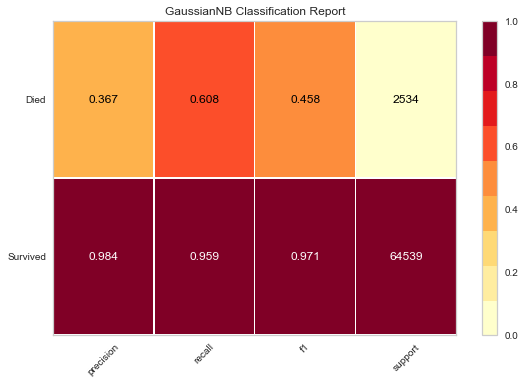

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [29]:
target = ['Survived','Died']
visualizer = ClassificationReport(model, classes=target, support=True)
visualizer.fit(X_train, y_train)      
visualizer.score(X_test, y_test)  
visualizer.show()


In [30]:
model = SVC(kernel='linear')

In [31]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [32]:
model.score(X_test,y_test)

0.9686461020082596

/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


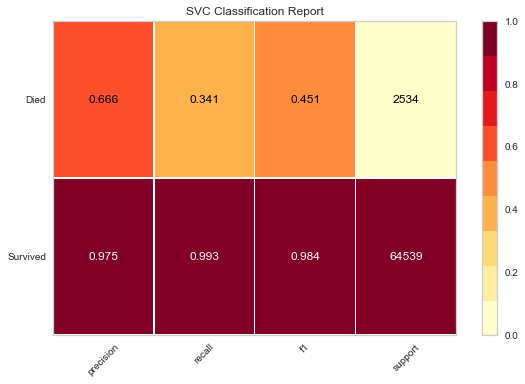

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [33]:
target = ['Survived','Died']
visualizer = ClassificationReport(model, classes=target, support=True)
visualizer.fit(X_train, y_train)      
visualizer.score(X_test, y_test)  
visualizer.show()